# Please be sure to check out the readme file: Clustering_Stocks_X1

 ---

- Import Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D as A3d
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
# ---



- Data Load:


In [3]:
# Importing stock names
data = pd.read_csv('stock_name.csv')
stock_name = pd.DataFrame()
stock_name['Name'] = data['Symbol'].str.replace('^','')

stock_name.head(10)
stock_name.shape

stock_details = pd.read_csv('stocks.csv')

In [4]:
stock_name.head(10)

,Name
0,A
1,AA
2,AABA
3,AAC
4,AAL
5,AAMC
6,AAME
7,AAN
8,AAOI
9,AAON


In [5]:
stock_details.head(10)

,beta,bookValuePerShare,currentRatio,divGrowthRate3Year,dividendAmount,dividendDate,dividendPayAmount,dividendPayDate,dividendYield,epsChange,...,revChangeYear,sharesOutstanding,shortIntDayToCover,shortIntToFloat,symbol,totalDebtToCapital,totalDebtToEquity,vol10DayAvg,vol1DayAvg,vol3MonthAvg
0,1.21802,2.79895,1.31538,0.0,3.080000,2019-05-10 00:00:00.0,0.770000,2019-08-16 00:00:00.0,1.57,0.0,...,0.0,4601.07500,0.0,0.0,AAPL,51.54927,106.39520,22963900.0,22963900.0,585636010.0
1,2.35784,0.00000,18.20330,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,63.78077,0.0,0.0,ADVM,0.00000,0.00000,625225.0,625220.0,13701860.0
2,0.85623,31.06079,3.46119,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,59.12744,0.0,0.0,AAXN,0.00000,0.00000,1287277.0,1287280.0,15188870.0
3,0.66686,0.00000,6.23734,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,50.06428,0.0,0.0,ACTG,0.00000,0.00000,104801.0,104800.0,2676700.0
4,0.94418,0.00000,0.00000,0.0,1.338665,2019-06-17 00:00:00.0,0.411154,2019-12-23 00:00:00.0,1.95,0.0,...,0.0,58.80000,0.0,0.0,AAXJ,0.00000,0.00000,736602.0,736600.0,29469660.0
5,1.13043,0.00000,1.41165,0.0,1.000000,2019-05-17 00:00:00.0,0.250000,2019-09-09 00:00:00.0,8.18,0.0,...,0.0,18.64930,0.0,0.0,ADES,39.15706,64.35760,109153.0,109150.0,4514110.0
6,1.81947,4.46170,1.68264,0.0,0.240000,2019-05-23 00:00:00.0,0.060000,2019-09-19 00:00:00.0,3.28,0.0,...,0.0,102.08900,0.0,0.0,ACCO,56.81048,131.53770,739711.0,739710.0,11191970.0
7,1.65041,0.00000,7.03319,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,27.53321,0.0,0.0,ADMS,65.47022,189.60510,343842.0,343840.0,8431980.0
8,1.32137,0.00000,1.53491,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,47.44241,0.0,0.0,ADMP,5.82159,6.18144,227681.0,227680.0,6856770.0
9,1.78904,0.00000,6.61413,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,1.41347,0.0,0.0,ABIO,0.00000,0.00000,141922.0,141920.0,17082680.0


In [6]:
stock_details.shape

(5222, 46)

In [7]:
# ----

- Data Transformation:

In [8]:
# Defininig our indicators
indicators = stock_details[['returnOnAssets', 'returnOnInvestment', 'returnOnEquity', 'symbol']]
indicators.head()

,returnOnAssets,returnOnInvestment,returnOnEquity,symbol
0,15.8055,21.30287,48.18294,AAPL
1,0.0000,0.00000,0.00000,ADVM
2,4.0626,5.47783,6.76543,AAXN
3,0.0000,0.00000,0.00000,ACTG
4,0.0000,0.00000,0.00000,AAXJ


In [9]:
# K-Means-Neighbor does not operate with missing values.
# So lets check how many missing values exist

In [10]:
indicators.isnull().sum()

returnOnAssets        0
returnOnInvestment    0
returnOnEquity        0
symbol                0
dtype: int64

In [11]:
size_y = indicators.shape[0]
size_x = indicators.shape[1]-1

In [12]:
# K-Means-Neighbor does not operate with values = 0.
# So lets check how many values = 0 exist

In [13]:
indicators = indicators[indicators[['returnOnAssets', 'returnOnInvestment', 'returnOnEquity', 'symbol']] != 0]
indicators = indicators.dropna()
indicators = indicators.set_index('symbol')
indicators.head(10)

,returnOnAssets,returnOnInvestment,returnOnEquity
symbol,,,
AAPL,15.80550,21.30287,48.18294
AAXN,4.06260,5.47783,6.76543
ADES,30.16776,36.04312,45.43475
ACCO,3.53989,4.31677,12.91672
AAWW,4.19331,4.94682,12.08748
ADUS,5.33343,6.52183,7.51694
AB,15.50523,15.50523,15.52055
AC,2.10367,2.43643,6.80088
AE,2.24153,4.17254,4.50629


In [14]:
# For surity convert the Data_Frame to float values
indicators = indicators.astype('float')
indicators.head(3)

,returnOnAssets,returnOnInvestment,returnOnEquity
symbol,,,
AAPL,15.80550,21.30287,48.18294
AAXN,4.06260,5.47783,6.76543
ADES,30.16776,36.04312,45.43475


In [15]:
# Remove outliers

In [16]:
'''

NYU provides base industry stock prices.
We will use the NYU means on ROI, ROE and ROA to eliminate the outliers.
-ROA should not be expected to be more than 30
-ROE should not be expected to be more than 40
-ROI should not be expected to be more than 30

'''

'\n\nNYU provides base industry stock prices.\nWe will use the NYU means on ROI, ROE and ROA to eliminate the outliers.\n-ROA should not be expected to be more than 30\n-ROE should not be expected to be more than 40\n-ROI should not be expected to be more than 30\n\n'

In [17]:
a = indicators.iloc[:, 0] < 30
b = indicators.iloc[:, 1] < 30
c = indicators.iloc[:, 2] < 40

indicators = indicators[a & b & c]

In [18]:
display(indicators.head(3))
display(indicators.shape)

,returnOnAssets,returnOnInvestment,returnOnEquity
symbol,,,
AAXN,4.06260,5.47783,6.76543
ACCO,3.53989,4.31677,12.91672
AAWW,4.19331,4.94682,12.08748


(1886, 3)

In [19]:
# Clean dataFrame 
Switch_DF = pd.DataFrame()
Switch_DF['ROA'] = indicators.iloc[:, 0]
Switch_DF['ROI'] = indicators.iloc[:, 1]
Switch_DF['ROE'] = indicators.iloc[:, 2]
indicator = Switch_DF
#- #
indicator.describe()

,ROA,ROI,ROE
count,1886.000000,1886.000000,1886.000000
mean,5.964759,7.578311,12.588871
std,4.582212,5.824265,8.701498
min,0.036950,0.041490,0.044180
25%,2.577992,3.136615,5.750330
50%,4.765765,6.151425,11.045815
75%,8.168385,10.504722,17.580588
max,26.093900,29.889750,39.538890


In [20]:
# ---

- Visualization:

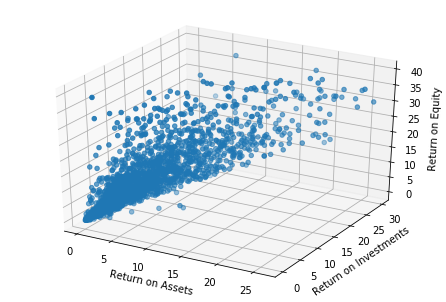

In [21]:
roa_list = list(indicator.iloc[: , 0])
roi_list = list(indicator.iloc[: , 1])
roe_list = list(indicator.iloc[: , 2])

image = plt.figure()
axes = A3d(image)

axes.set_xlabel('Return on Assets')
axes.set_ylabel('Return on Investments')
axes.set_zlabel('Return on Equity')

axes.scatter(roa_list, roi_list, roe_list)

In [22]:
min_max_norm = MinMaxScaler()
standard_norm = StandardScaler()
iqr_norm = RobustScaler()

min_max_indicators = min_max_norm.fit_transform(indicator)
standard_indicators = standard_norm.fit_transform(indicator)
iqr_indicators = iqr_norm.fit_transform(indicator)

In [23]:
# Min - Max scatter plot

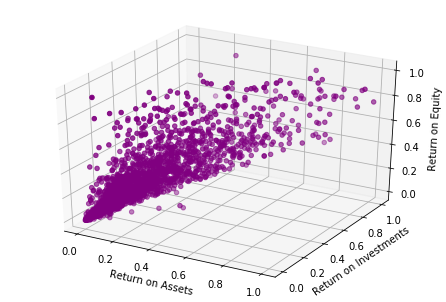

In [24]:
roa_list = (min_max_indicators[: , 0])
roi_list = (min_max_indicators[: , 1])
roe_list = (min_max_indicators[: , 2])

image = plt.figure()
axes = A3d(image)

axes.set_xlabel('Return on Assets')
axes.set_ylabel('Return on Investments')
axes.set_zlabel('Return on Equity')

axes.scatter(roa_list, roi_list, roe_list, c='purple')

In [25]:
# IQR Scatter Plot

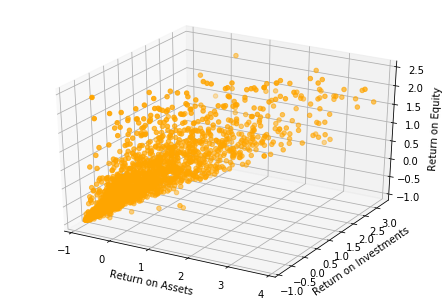

In [26]:
roa_list = (iqr_indicators[: , 0])
roi_list = (iqr_indicators[: , 1])
roe_list = (iqr_indicators[: , 2])

image = plt.figure()
axes = A3d(image)

axes.set_xlabel('Return on Assets')
axes.set_ylabel('Return on Investments')
axes.set_zlabel('Return on Equity')

axes.scatter(roa_list, roi_list, roe_list, c='orange')

In [27]:
# Z-score plot

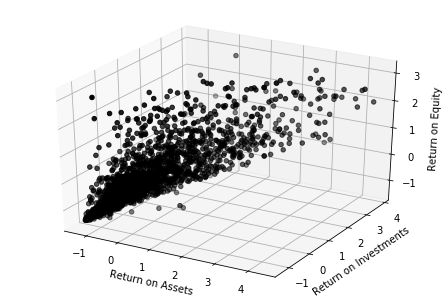

In [28]:
roa_list = (standard_indicators[: , 0])
roi_list = (standard_indicators[: , 1])
roe_list = (standard_indicators[: , 2])

image = plt.figure()
axes = A3d(image)

axes.set_xlabel('Return on Assets')
axes.set_ylabel('Return on Investments')
axes.set_zlabel('Return on Equity')

axes.scatter(roa_list, roi_list, roe_list, c='k')

In [29]:
# The idea is now to take data out of our data but still preserve data's meaning.
# This will speed up & enhance our KMN model.
# For this we will use PCA

In [30]:
pca = PCA()
Indicator_PCA = pca.fit(iqr_indicators)
Indicator_PCA

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

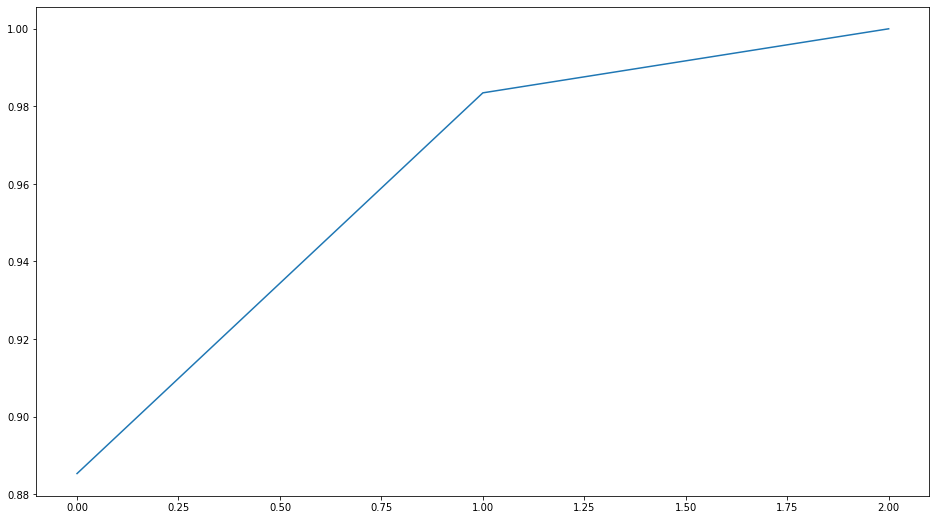

In [31]:
variance = Indicator_PCA.explained_variance_ratio_
variance_optimized = np.cumsum(variance)

plt.figure(figsize = (16, 9))
plt.plot(variance_optimized)

In [32]:
# With 2 components one can achieve almost 100% variance

In [33]:
pca_two = PCA(n_components = 2)

pca_transform = pca_two.fit(iqr_indicators).transform(iqr_indicators)

pca_indicators = pd.DataFrame(data = pca_transform, columns = ['PC1', 'PC2'])

In [34]:
pca_indicators.head(3)

,PC1,PC2
0,-0.629487,-0.200409
1,-0.522683,0.330626
2,-0.433569,0.196831


In [35]:
# ---

- KMN Model construction:

In [36]:
'''

Sklearn's KMeans provides us a silhoutte function
This function ranges from (-1, 1).
Our aim is to get a silhouette score leaning more to 1.
This score will go down with more clusters.
Lets see how the score will fare with 20 clusters.

'''

"\n\nSklearn's KMeans provides us a silhoutte function\nThis function ranges from (-1, 1).\nOur aim is to get a silhouette score leaning more to 1.\nThis score will go down with more clusters.\nLets see how the score will fare with 20 clusters.\n\n"

In [42]:
# 
for i in range(2, 20): # We start with 2 because we atleast want 2 clusters
    
    model = KMeans(n_clusters = i)
    results_intial = model.fit(iqr_indicators)
    results = metrics.silhouette_score(iqr_indicators, results_intial.labels_, metric='euclidean')
    print('\n*** ')
    print('Number of clusters: ', i)
    print('Silouette score: ', results)


*** 
Number of clusters:  2
Silouette score:  0.5409025131522358

*** 
Number of clusters:  3
Silouette score:  0.4715762202588651

*** 
Number of clusters:  4
Silouette score:  0.40576519772835445

*** 
Number of clusters:  5
Silouette score:  0.41754425725255817

*** 
Number of clusters:  6
Silouette score:  0.3953490728131958

*** 
Number of clusters:  7
Silouette score:  0.3677550160812115

*** 
Number of clusters:  8
Silouette score:  0.3663241022370426

*** 
Number of clusters:  9
Silouette score:  0.3447283992543069

*** 
Number of clusters:  10
Silouette score:  0.34219340938142906

*** 
Number of clusters:  11
Silouette score:  0.34798595426092543

*** 
Number of clusters:  12
Silouette score:  0.3474225350978534

*** 
Number of clusters:  13
Silouette score:  0.3466997777266043

*** 
Number of clusters:  14
Silouette score:  0.32559789863505595

*** 
Number of clusters:  15
Silouette score:  0.3452347183716392

*** 
Number of clusters:  16
Silouette score:  0.330628085822526

In [43]:
for i in range(2, 20): # We start with 2 because we atleast want 2 clusters
    
    model = KMeans(n_clusters = i)
    results_intial = model.fit(pca_indicators)
    results = metrics.silhouette_score(pca_indicators, results_intial.labels_, metric='euclidean')
    print('\n*** ')
    print('Number of clusters: ', i)
    print('Silouette score of PCA: ', results)


*** 
Number of clusters:  2
Silouette score of PCA:  0.5491540143144819

*** 
Number of clusters:  3
Silouette score of PCA:  0.4844668530469671

*** 
Number of clusters:  4
Silouette score of PCA:  0.421736963244495

*** 
Number of clusters:  5
Silouette score of PCA:  0.4349357588530468

*** 
Number of clusters:  6
Silouette score of PCA:  0.41633175026084307

*** 
Number of clusters:  7
Silouette score of PCA:  0.3854922296594229

*** 
Number of clusters:  8
Silouette score of PCA:  0.3977569967189157

*** 
Number of clusters:  9
Silouette score of PCA:  0.3909929438043301

*** 
Number of clusters:  10
Silouette score of PCA:  0.3725521322596413

*** 
Number of clusters:  11
Silouette score of PCA:  0.3831556283844445

*** 
Number of clusters:  12
Silouette score of PCA:  0.37981244696845695

*** 
Number of clusters:  13
Silouette score of PCA:  0.37177893126434747

*** 
Number of clusters:  14
Silouette score of PCA:  0.3794067542896044

*** 
Number of clusters:  15
Silouette scor

In [44]:
# We can feel good with 3 clusters from the above analysis

In [45]:
# Lets plot our clusters

In [94]:
model = KMeans(n_clusters = 3)
kmeans = model.fit(iqr_indicators)
centroids = kmeans.cluster_centers_
clustered_divide = kmeans.labels_.astype('float')

Text(0.5, 0.92, 'Clusters')

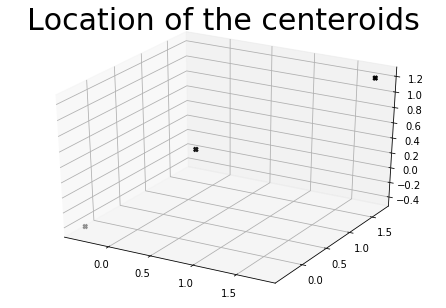

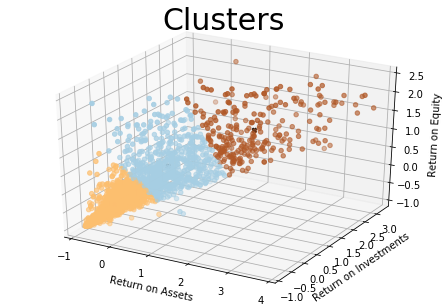

In [95]:
center_1 = centroids[:, 0]
center_2 = centroids[:, 1]
center_3 = centroids[:, 2]

image = plt.figure()
axes = A3d(image)
axes.scatter(center_1, center_2, center_3, color = 'black', marker = 'X')
plt.title('Location of the centeroids', fontsize = 30)

roa_list = (iqr_indicators[: , 0])
roi_list = (iqr_indicators[: , 1])
roe_list = (iqr_indicators[: , 2])

image = plt.figure()
axes = A3d(image)

axes.set_xlabel('Return on Assets')
axes.set_ylabel('Return on Investments')
axes.set_zlabel('Return on Equity')

axes.scatter(roa_list, roi_list, roe_list, c = clustered_divide, cmap='Paired')
axes.scatter(center_1, center_2, center_3, color = 'black', marker = 'X')
plt.title('Clusters', fontsize = 30)

/Users/sidx/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Clusters in 2D')

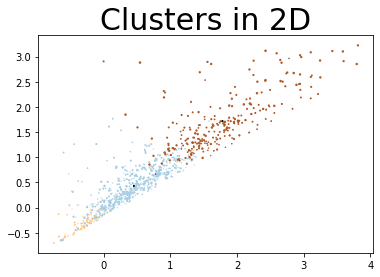

In [96]:
center_1 = centroids[:, 0]
center_2 = centroids[:, 1]
center_3 = centroids[:, 2]

plt.scatter(roa_list, roi_list, roe_list, c = clustered_divide, cmap='Paired')
plt.scatter(center_1, center_2, center_3, color = 'black', marker = 'X')
plt.title('Clusters in 2D', fontsize = 30)

In [74]:
# PCA Clusters

In [97]:
model_pca = KMeans(n_clusters = 3)
kmeans_pca = model_pca.fit(pca_indicators)
centroids = kmeans_pca.cluster_centers_
clustered_divide = kmeans_pca.labels_.astype('float')

/Users/sidx/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Clusters in PCA Stocks')

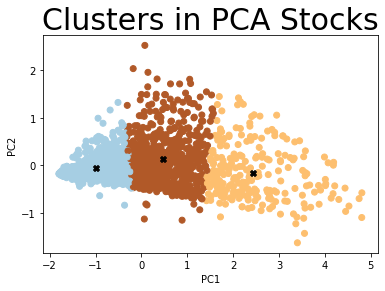

In [98]:
center_1 = centroids[:, 0]
center_2 = centroids[:, 1]

plt.scatter(center_1, center_2, center_3, color = 'black', marker = 'X')
plt.title('Location of the centeroids', fontsize = 30)

PC1 = (pca_indicators['PC1'])
PC2 = (pca_indicators['PC2'])


plt.xlabel('PC1')
plt.ylabel('PC2')

plt.scatter(PC1, PC2, c = clustered_divide, cmap='Paired')
plt.scatter(center_1, center_2, color = 'black', marker = 'X')
plt.title('Clusters in PCA Stocks', fontsize = 30)

In [99]:
# ---

- Testing the model:

In [104]:
test_stocks = [[0.2, 3.4, 4.6],
              [0.8, 4.6, 5.8]]

kmeans.predict(test_stocks)

array([2, 2], dtype=int32)